In [2]:
# install.packages("devtools")
# devtools::install_github("hadley/tidyverse")
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


### First, load up the data

First you're going to want to create a data frame from the dailybots.csv file which can be found in the data directory. You should be able to do this with the read_csv() function from the `readr` package (loaded with `tidyverse`). Take a minute to look at the dataframe because we are going to be using it for this entire worksheet.

In [4]:
### use "read_csv" from `readr`
### see `vignette("column-types")` for details on col_types
dailybot <- read_csv("../../Data/dailybots.csv")

### look at a summary of the data
summary(dailybot)

## could make the botfam and industry a factor so sumamarize counts them
summary(factor(dailybot$botfam))  # note, factor is only for the summary function
summary(factor(dailybot$industry))  # source data in `dailybots` is left unchanged.

## or count them with dplyr
#dailybot %>% count(botfam)
#dailybot %>% count(industry)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  botfam = col_character(),
  industry = col_character(),
  hosts = col_integer(),
  orgs = col_integer()
)


      date               botfam            industry             hosts       
 Min.   :2016-06-01   Length:4969        Length:4969        Min.   :   1.0  
 1st Qu.:2016-06-22   Class :character   Class :character   1st Qu.:  10.0  
 Median :2016-07-15   Mode  :character   Mode  :character   Median :  38.0  
 Mean   :2016-07-14                                         Mean   : 142.3  
 3rd Qu.:2016-08-06                                         3rd Qu.: 187.0  
 Max.   :2016-08-29                                         Max.   :2031.0  
      orgs       
 Min.   :  1.00  
 1st Qu.:  3.00  
 Median :  7.00  
 Mean   : 15.31  
 3rd Qu.: 16.00  
 Max.   :122.00  

Bedep ConfickerAB      Necurs     Olmasco      PushDo      Ramnit 
        535         540         511         309         418         540 
     Sality  zeroaccess        Zeus        Zusy 
        540         538         540         498

Education             Finance Government/Politics Healthcare/Wellness 
                820                 789                 793                 798 
      Manufacturing              Retail 
                895                 874

### Exercise 1: Which industry sees the most Ramnit infections?  Least?

Count the number of infected days for "Ramnit" in each industry industry. 

1. First filter (`dplyr::filter`) the data to remove all the infections (bot families) we do not care about.
2. Aggregate the data on the column of interest 
    + Could use `dplyr::group_by` and `dplyr::summarize` to add up the hosts 
    + Or the simplified `dplyr::count` with `wt=hosts` which is just a convenience function)

In [5]:
dailybot %>% filter(botfam == "Ramnit") %>% count(industry, botfam, wt=hosts)

industry,botfam,n
Education,Ramnit,7492
Finance,Ramnit,2281
Government/Politics,Ramnit,4484
Healthcare/Wellness,Ramnit,544
Manufacturing,Ramnit,46303
Retail,Ramnit,17649


### Exercise 2: Calculate the min, max, median and mean infected orgs across industries for each bot family, sort by median

In this exercise, you are asked to calculate the min, max, median and mean of infected orgs for each bot family sorted by median.  

1. Try the `dplyr::group_by()` function on bot families.
2. `dplyr::summarize` will summarize for each unique group and can have multiple assignments in a single function call.
3. `dplyr::arrange` can take a column to sort by and wrapping a column in `desc()` will sort it descending.

In [6]:
dailybot %>% 
  group_by(botfam) %>% 
  summarize(min=min(orgs), max=max(orgs), median=median(orgs), mean=mean(orgs)) %>% 
  arrange(desc(median))

botfam,min,max,median,mean
ConfickerAB,27,122,56.5,63.035185
Sality,2,43,12.0,15.909259
Necurs,1,115,11.0,16.739726
Ramnit,1,60,9.0,14.703704
Zeus,1,36,8.0,9.988889
Bedep,1,42,6.0,8.016822
zeroaccess,1,19,5.0,5.481413
Zusy,1,20,4.0,5.279116
PushDo,1,12,2.0,2.882775
Olmasco,1,6,1.0,1.592233


### Exercise 3: Which date had the total most bot infections and how many infections on that day?

In this exercise you are asked to aggregate and sum the number of infections (hosts) by date. Once you've done that, the next step is to sort in descending order.

Hint: ignore botfam and industry, use dplyr::count and dplyr::top_n

In [7]:
dailybot %>% 
  count(date, wt=hosts) %>% top_n(1, n)

date,n
2016-06-02,11352


### Exercise 4: Plot the daily infected hosts for Necurs, Ramnit and Pushdo

In this exercise you're going to plot the daily infected hosts for three infection types. In order to do this, you'll need to do the following steps:

1. Filter the data to remove the bot families we don't care about.
2. Aggregate (count) the data by date and family, then sum up the hosts in each group
3. Plot the data. 

Hint: You may want to de-emphasize the lines by adding `linetype="dashed"` to the lines and then add a `geom_smooth` to smooth the weekly periodicity.

`geom_smooth()` using method = 'loess'


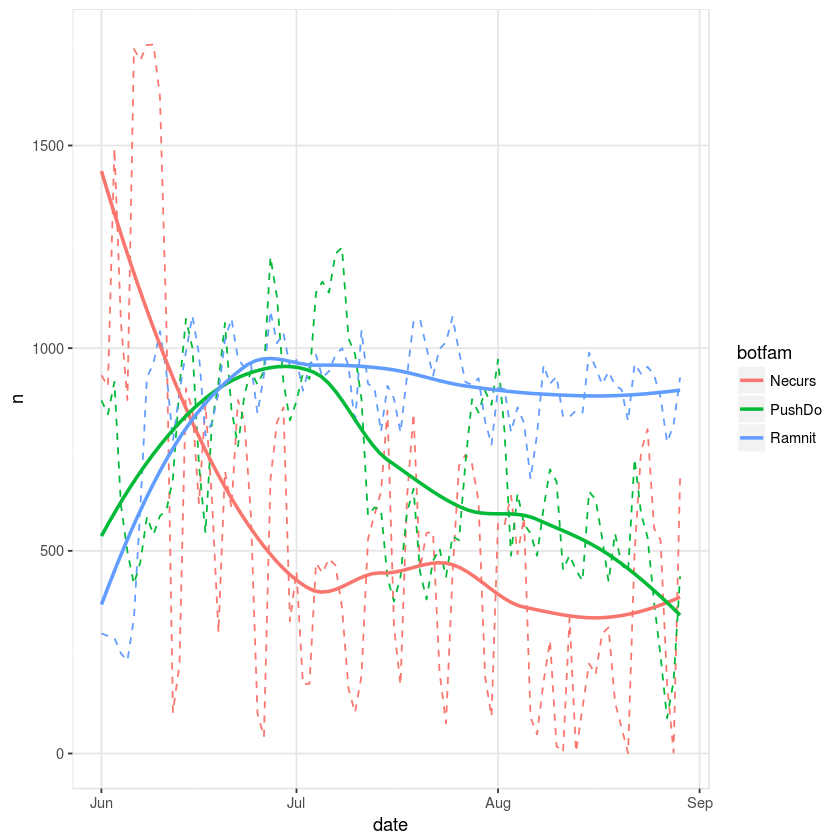

In [8]:
toplot <- dailybot %>% 
  filter(botfam %in% c("Necurs", "Ramnit", "PushDo")) %>% 
  count(date, botfam, wt=hosts)
  
ggplot(toplot, aes(date, n, color=botfam)) +
  geom_line(linetype="dashed") +
  geom_smooth(se=FALSE) +
  theme(panel.background = element_rect(fill=NA, color="gray90"),
        panel.grid.major = element_line(color="gray90"))

### Exercise 5: What are the distribution of infected hosts for each day-of-week across all bot families?  

Hint: try a box plot and/or violin plot

1. Sum up the hosts for each date.
2. Create a column for the day of the week 
    + Use `dplyr::mutate` to assign `format` and then the correct date representation from `?strptime` to a new column
3. You may have to create an ordered factor (`?factor`) with the days of week to ensure correct order in the plot.
4. Use `geom_boxplot()` or `geom_violion()`

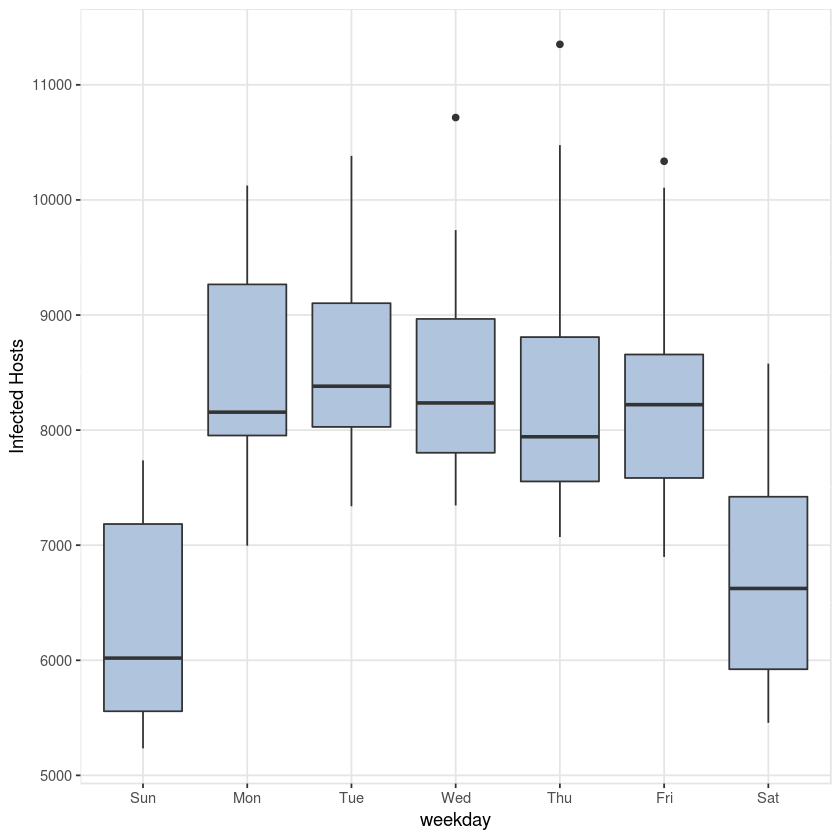

In [9]:
toplot <- dailybot %>% 
  # sum up hosts for each date
  count(date, wt=hosts) %>% 
  # get the weekday
  mutate(weekday = format(date, "%a")) %>% 
  # make the weekdays pretty and in order
  mutate(weekday = factor(weekday, 
                          levels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"), 
                          ordered=TRUE))

ggplot(toplot, aes(weekday, n)) +
  geom_boxplot(fill="lightsteelblue") +
  scale_y_continuous("Infected Hosts", breaks = seq(5000, 12000, 1000)) +
  theme(panel.background = element_rect(fill=NA, color="gray90"),
        panel.grid.major = element_line(color="gray90"))